In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [5]:
df=pd.read_csv("C:/Users/raswa/OneDrive/Desktop/excel_bluet/supermarket_sales - Sheet1.csv")

In [16]:
df.head()

,branch,city,ctype,gender,pline,unitprice,quantity,Tax 5%,total,date,cogs,gross%,gross_income,rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,604.17,4.761905,30.2085,5.3


In [8]:
df=df.drop(columns={'Invoice ID','Time','Payment'})

In [15]:
df=df.rename(columns={'Date':'date','cogs':'cogs','gross margin percentage':'gross%','gross income':'gross_income','Rating':'rating'})

In [24]:
df['date']=df['date'].map(dt.datetime.toordinal)

In [20]:
df['date']=pd.to_datetime(df['date'])

In [21]:
df.dtypes

branch                  object
city                    object
ctype                   object
gender                  object
pline                   object
unitprice              float64
quantity                 int64
Tax 5%                 float64
total                  float64
date            datetime64[ns]
cogs                   float64
gross%                 float64
gross_income           float64
rating                 float64
dtype: object

In [25]:
df.head()

,branch,city,ctype,gender,pline,unitprice,quantity,Tax 5%,total,date,cogs,gross%,gross_income,rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,737064,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,737126,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,737121,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,737086,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,737098,604.17,4.761905,30.2085,5.3


In [27]:
df2=df

In [28]:
df2.tail()

,branch,city,ctype,gender,pline,unitprice,quantity,Tax 5%,total,date,cogs,gross%,gross_income,rating
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,737088,40.35,4.761905,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,737120,973.80,4.761905,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,737099,31.84,4.761905,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,737112,65.82,4.761905,3.2910,4.1
999,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,737108,618.38,4.761905,30.9190,6.6


In [30]:
df2=df2[['date','city','branch','unitprice','Tax 5%','gross_income']]

In [31]:
df2.head()

,date,city,branch,unitprice,Tax 5%,gross_income
0,737064,Yangon,A,74.69,26.1415,26.1415
1,737126,Naypyitaw,C,15.28,3.8200,3.8200
2,737121,Yangon,A,46.33,16.2155,16.2155
3,737086,Yangon,A,58.22,23.2880,23.2880
4,737098,Yangon,A,86.31,30.2085,30.2085


In [32]:
from sklearn.model_selection  import train_test_split

In [33]:
from sklearn.linear_model import LinearRegression

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
df2.tail()

,date,city,branch,unitprice,Tax 5%,gross_income
995,737088,Naypyitaw,C,40.35,2.0175,2.0175
996,737120,Mandalay,B,97.38,48.6900,48.6900
997,737099,Yangon,A,31.84,1.5920,1.5920
998,737112,Yangon,A,65.82,3.2910,3.2910
999,737108,Yangon,A,88.34,30.9190,30.9190


In [39]:
x=df2['date']
y=df2['gross_income']

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)

In [41]:
rfr=RandomForestRegressor()


In [42]:
rfr

RandomForestRegressor()

In [43]:
rfr.fit(np.array(x).reshape(-1,1),np.array(y).reshape(-1,1))

C:\Users\raswa\AppData\Local\Temp\ipykernel_18248\1733611094.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(np.array(x).reshape(-1,1),np.array(y).reshape(-1,1))


RandomForestRegressor()

In [45]:
rfr.predict([[737109]])

array([22.93568348])

In [47]:
df2.head()

,date,city,branch,unitprice,Tax 5%,gross_income
0,737064,Yangon,A,74.69,26.1415,26.1415
1,737126,Naypyitaw,C,15.28,3.8200,3.8200
2,737121,Yangon,A,46.33,16.2155,16.2155
3,737086,Yangon,A,58.22,23.2880,23.2880
4,737098,Yangon,A,86.31,30.2085,30.2085


In [51]:
a=df2.groupby(df['city']).sum()

C:\Users\raswa\AppData\Local\Temp\ipykernel_18248\1892107903.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a=df2.groupby(df['city']).sum()


In [54]:
a

,date,unitprice,Tax 5%,gross_income
city,,,,
Mandalay,244718643,18478.88,5057.0320,5057.0320
Naypyitaw,241769662,18567.76,5265.1765,5265.1765
Yangon,250615699,18625.49,5057.1605,5057.1605


In [56]:
df2.head()

,date,city,branch,unitprice,Tax 5%,gross_income
0,737064,Yangon,A,74.69,26.1415,26.1415
1,737126,Naypyitaw,C,15.28,3.8200,3.8200
2,737121,Yangon,A,46.33,16.2155,16.2155
3,737086,Yangon,A,58.22,23.2880,23.2880
4,737098,Yangon,A,86.31,30.2085,30.2085


In [60]:
x=df2['city']
y=df2['gross_income']

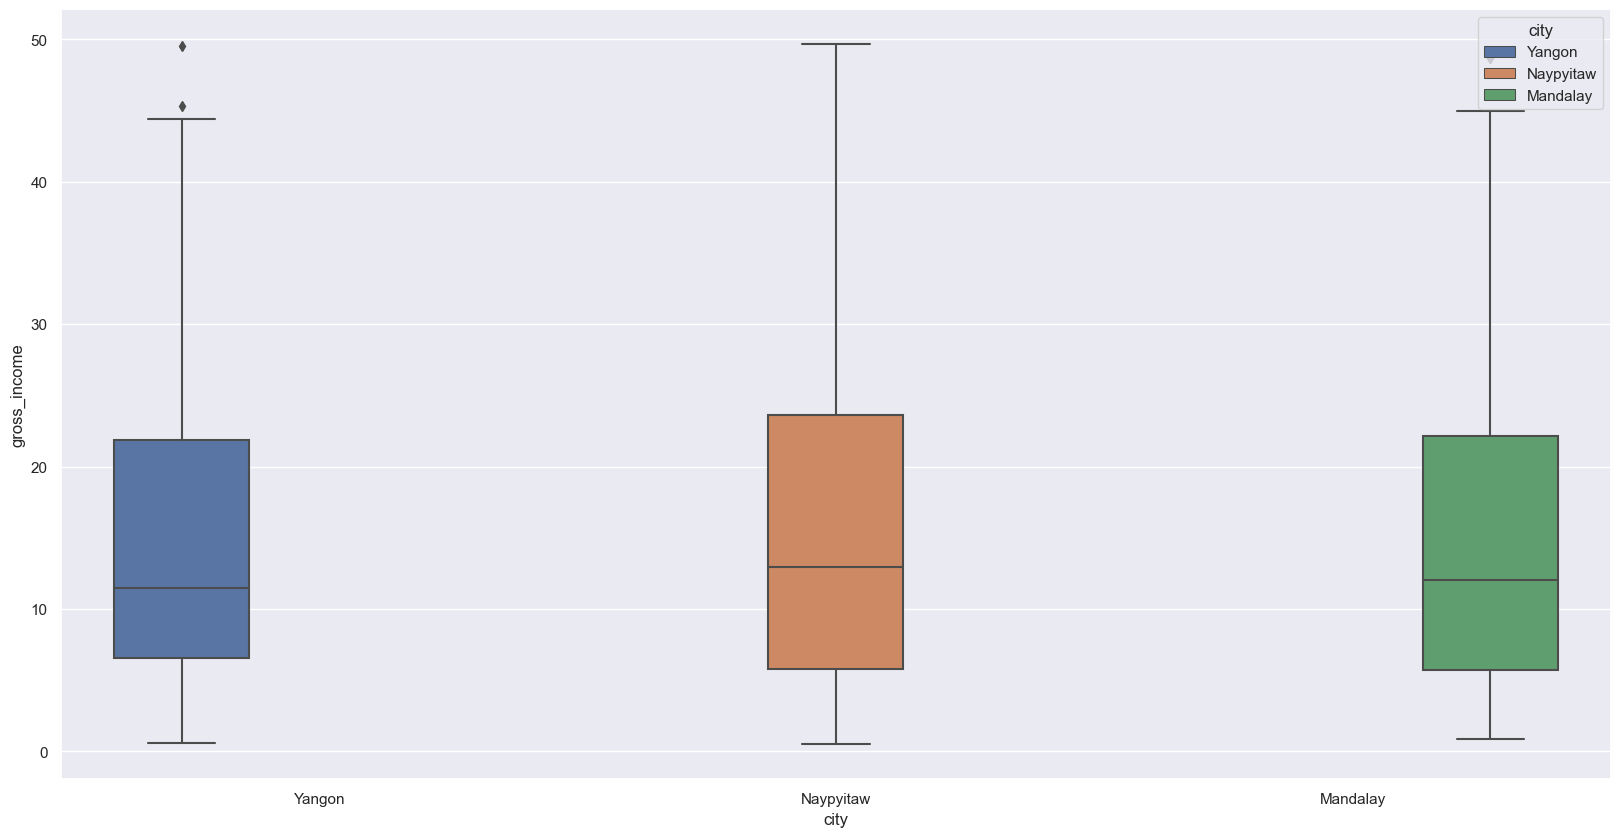

In [73]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x='city',y='gross_income',data=df2,hue='city')
plt.show()

In [75]:
df2

,date,city,branch,unitprice,Tax 5%,gross_income
0,737064,Yangon,A,74.69,26.1415,26.1415
1,737126,Naypyitaw,C,15.28,3.8200,3.8200
2,737121,Yangon,A,46.33,16.2155,16.2155
3,737086,Yangon,A,58.22,23.2880,23.2880
4,737098,Yangon,A,86.31,30.2085,30.2085
...,...,...,...,...,...,...
995,737088,Naypyitaw,C,40.35,2.0175,2.0175
996,737120,Mandalay,B,97.38,48.6900,48.6900
997,737099,Yangon,A,31.84,1.5920,1.5920
998,737112,Yangon,A,65.82,3.2910,3.2910


In [78]:
x=df2['Tax 5%']
y=df2['gross_income']

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [80]:
rfr

RandomForestRegressor()

In [81]:
rfr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

C:\Users\raswa\AppData\Local\Temp\ipykernel_18248\726364490.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))


RandomForestRegressor()

In [83]:
rfr.predict([[1.4893]])

array([1.485665])

In [84]:

rfr.predict([[35.9190]])

array([35.846005])

In [94]:
a=a.reset_index()

In [132]:
a

,city,date,unitprice,Tax 5%,gross_income
0,Mandalay,244718643,18478.88,5057.0320,5057.0320
1,Naypyitaw,241769662,18567.76,5265.1765,5265.1765
2,Yangon,250615699,18625.49,5057.1605,5057.1605


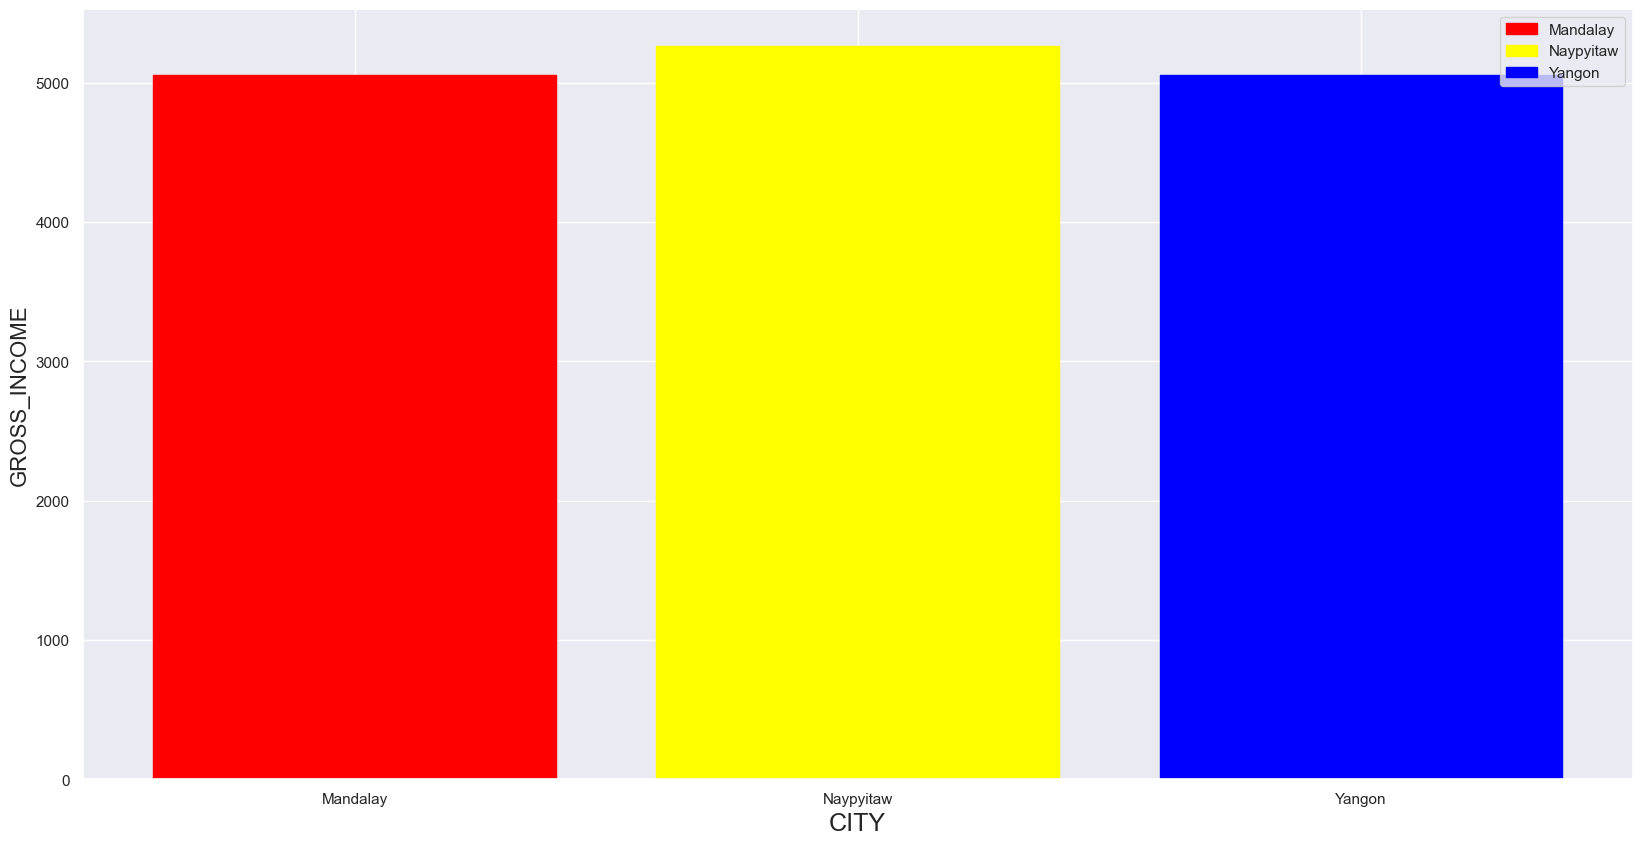

In [133]:
label=['Mandalay','Naypyitaw','Yangon']
b=plt.bar(a['city'],a['gross_income'],label=label)
b[0].set_color('red')
b[1].set_color('yellow')
b[2].set_color('blue')
plt.xlabel('CITY',size=18)
plt.ylabel('GROSS_INCOME',size=16,rotation=90,loc='center')
plt.legend()
plt.show()